In [4]:
#from mylib import *
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

base_dir = "/mnt/z/Users/Kevin/Pictures/tbg2/"

/tmp/ipykernel_2118401/3740506763.py:60: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=map_object)
/tmp/ipykernel_2118401/3740506763.py:64: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=map_object)


ValueError: A colormap named "rainbow_alpha" is already registered.

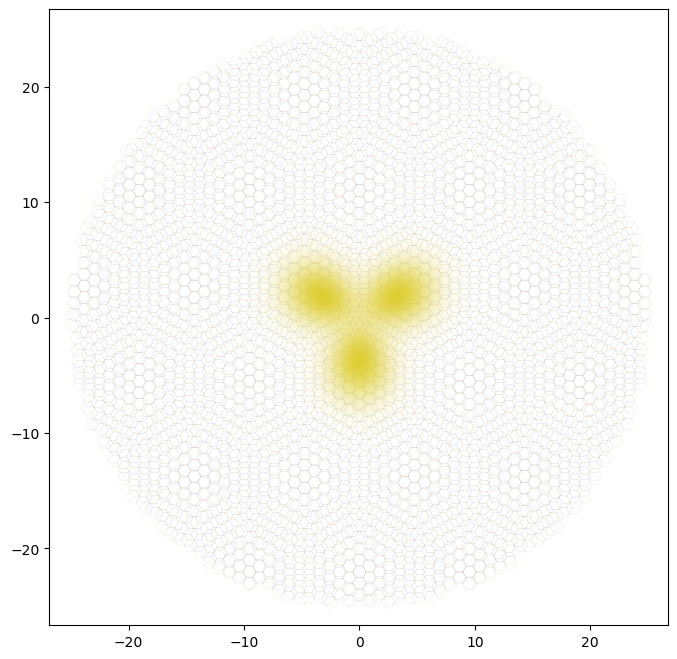

In [2]:
import matplotlib.patheffects as PathEffects
inverse_lattice = 6/180 * np.pi

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

grid1, _ = create_hex_grid(
    nx=70,
    ny=70,
    rotate_deg=-33,
    min_diam=1,
)

grid2, _ = create_hex_grid(
    nx=70,
    ny=70,
    min_diam=1,
    rotate_deg=-27,
)

neworigin = 1 / inverse_lattice / np.sqrt(3)
latticeconstant = 1 / inverse_lattice / np.sqrt(3)

rad = ((grid1[:, 0])**2 + (grid1[:, 1] - neworigin)**2)**0.5
grid1 = grid1[rad.flatten() <= 25, :]
rad = ((grid2[:, 0])**2 + (grid2[:, 1] - neworigin)**2)**0.5
grid2 = grid2[rad.flatten() <= 25, :]

plot_single_lattice(grid1[:, 0], grid1[:, 1] - neworigin, face_color=None, edge_color=(150/255,147/255,181/255, 0.3), min_diam=1, plotting_gap=0, rotate_deg=-33, h_ax=ax)
plot_single_lattice(grid2[:, 0], grid2[:, 1] - neworigin, face_color=None, edge_color=(179/255,143/255,68/255, 0.3), min_diam=1, plotting_gap=0, rotate_deg=-27, h_ax=ax)



#plt.axvline(1 / inverse_lattice / 2)



from matplotlib.colors import LinearSegmentedColormap


X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
R = 1.8
Z = np.exp(-(Y-R)**2 - X**2) + \
    np.exp(-(Y+R/2)**2 - (X+R*np.sqrt(3)/2)**2) + \
    np.exp(-(Y+R/2)**2 - (X-R*np.sqrt(3)/2)**2)
Z = Z / (X ** 2 + Y ** 2 + 0.7)

extent = 15

def to_rgba(hex, alpha):
    return ((hex >> 16) / 256, ((hex >> 8) & 0xFF) / 256, (hex & 0xFF) / 256, alpha)

color1 = 0x4dab2f
color2 = 0xdecd2b
color3 = 0xf78026
color4 = 0xfd58f7
color5 = 0x9c78fa
color6 = 0x4db2f1

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(color2, 0), to_rgba(color2, 0.95),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent, extent, -extent, extent), zorder=1)

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(color1, 0), to_rgba(color1, 0.5),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent -latticeconstant * np.sqrt(3) / 2, +extent -latticeconstant * np.sqrt(3) / 2,
                                           -latticeconstant/2 + extent, -latticeconstant/2-extent), zorder=1)



def draw_hexalattice():
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(-3, 3, 1):
        for x in range(6 - abs(y)):
            Hexa.append((latticeconstant * np.sqrt(3) * (x - 1/2 - 2) + latticeconstant * np.sqrt(3) / 2 * abs(y),
                         latticeconstant *  np.sqrt(3) * y * np.sqrt(3) / 2 + latticeconstant / 2))
            if x != 0:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 1)))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 2)))
            if y < 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y))))
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y) - 1)))

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color='k', ls='--', lw=3, zorder=1.5))
    
    
def draw_duallattice():
    from matplotlib import collections as mc
    Dual = []
    DualLines = []

    for y in range(-3, 4):
        if y == 3: lim = (0, 5)
        elif y == 2: lim = (-2, 9)
        elif y == 1: lim = (-1, 10)
        elif y == 0: lim = (0, 11)
        elif y == -1: lim = (-1, 10)
        elif y == -2: lim = (-1, 8)
        else: lim = (1, 4)
            
        for x in range(*lim):
            Dual.append(
                (
                    latticeconstant * np.sqrt(3) * (x - 5) / 2 + latticeconstant * np.sqrt(3) / 2 * abs(y),
                    (latticeconstant * np.sqrt(3) * y * np.sqrt(3) / 2 -
                         (latticeconstant * np.sqrt(3) / np.sqrt(3) if x % 2 == 0 else latticeconstant * np.sqrt(3) * np.sqrt(3) / 2 - latticeconstant * np.sqrt(3) / np.sqrt(3))
                    ) +  latticeconstant / 2
                )
            )
            if x != lim[0]:
                DualLines.append((len(Dual) - 2, len(Dual) - 1))

    for i in range(2):
        DualLines.append((i * 2, i * 2 + 6))
        
    for i in range(5):
        DualLines.append((3 + i * 2, 3 + i * 2 + 10))
        
    for i in range(6):
        DualLines.append((12 + i * 2, 12 + i * 2 + 11))
        DualLines.append((34 + i * 2, 34 + i * 2 + 11))
    
    for i in range(5):
        DualLines.append((24 + i * 2, 24 + i * 2 + 11))
    
    for i in range(3):
        DualLines.append((48 + i * 2, 48 + i * 2 + 8))
                
    ax.add_collection(mc.LineCollection([(Dual[x], Dual[y]) for x, y in DualLines], color='k', lw=3, zorder=1.5))

    
draw_hexalattice()
draw_duallattice()
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

ax.set_xlim([-18, 18])
ax.set_ylim([-18, 18])
ax.set_xlim([-12, 12])
ax.set_ylim([-12 - latticeconstant, 12 - latticeconstant])

txt = ax.text(0, 0, "BA", horizontalalignment="center", verticalalignment="center", fontsize=40)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])
txt = ax.text(-latticeconstant * np.sqrt(3) / 2, -latticeconstant/2, "AB", horizontalalignment="center", verticalalignment="center", fontsize=40)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])
txt = ax.text(latticeconstant/2*np.sqrt(3), latticeconstant/2, "AA", horizontalalignment="center", verticalalignment="center", fontsize=40)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])

ax.axis('off')

plt.tight_layout()
plt.savefig(base_dir + "wannier.png", dpi=100)
plt.savefig(base_dir + "wannier.svg", dpi=100)


NameError: name 'draw_duallattice' is not defined

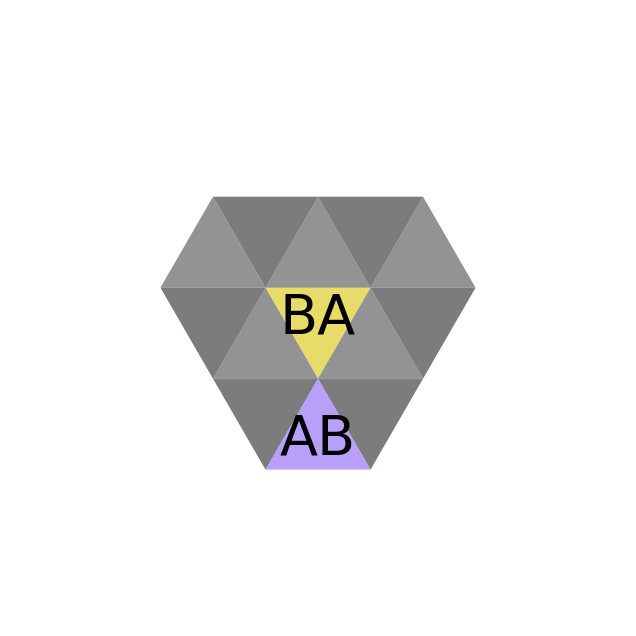

In [3]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

def trilatloc(xy, dir):
    if dir == "up":
        return (
            (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
            xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
        )
    else:
        return (
            xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
            xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
        )


def adddowntri(xy, color, name):
    xy = trilatloc(xy, "down")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=np.pi, facecolor=color)
    
    ax.text(xy[0], xy[1] - latticeconstant * 0, name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=4)

    ax.add_patch(polygon)
    
def adduptri(xy, color, name):
    xy = trilatloc(xy, "up")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=0, facecolor=color)
    
    ax.text(xy[0], xy[1], name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)

def lineupdown(xy1, xy2):
    xy1 = (
        xy1[0] * np.sqrt(3) * latticeconstant + xy1[1] * np.sqrt(3) * latticeconstant / 2,
        xy1[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    xy2 = (
        (xy2[0] + 1/2) * np.sqrt(3) * latticeconstant + xy2[1] * np.sqrt(3) * latticeconstant / 2,
        xy2[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    ax.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]], color=to_rgba(color4, 1), lw=5, zorder=1.5)

trialpha = 0.7
adddowntri((0, 0), to_rgba(color2, trialpha), "")
ax.text(0, 0, "BA", horizontalalignment="center", verticalalignment="center", fontsize=40)


colorgray = 0x666666
colorgray2 = 0x444444

adduptri((0, 0), to_rgba(colorgray, trialpha), "")
adduptri((-1, 0), to_rgba(colorgray, trialpha), "")
adduptri((-1, 1), to_rgba(colorgray, trialpha), "")

adddowntri((1, 0), to_rgba(colorgray2, trialpha), "")
adddowntri((-1, 0), to_rgba(colorgray2, trialpha), "")
adddowntri((0, 1), to_rgba(colorgray2, trialpha), "")
adddowntri((-1, 1), to_rgba(colorgray2, trialpha), "")
adddowntri((1, -1), to_rgba(colorgray2, trialpha), "")
adddowntri((0, -1), to_rgba(colorgray2, trialpha), "")

adduptri((0, 1), to_rgba(colorgray, trialpha), "")
adduptri((-2, 1), to_rgba(colorgray, trialpha), "")
adduptri((0, -1), to_rgba(color5, trialpha), "")

xy = trilatloc((0, -1), "up")
ax.text(xy[0], xy[1], "AB", horizontalalignment="center", verticalalignment="center", fontsize=40)

ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
draw_hexalattice()
ax.set_xlim([-18, 18])
ax.set_ylim([-18, 18])
plt.tight_layout()
# plt.savefig(base_dir + "overlap.png", dpi=100)
# plt.savefig(base_dir + "overlap.svg", dpi=100)

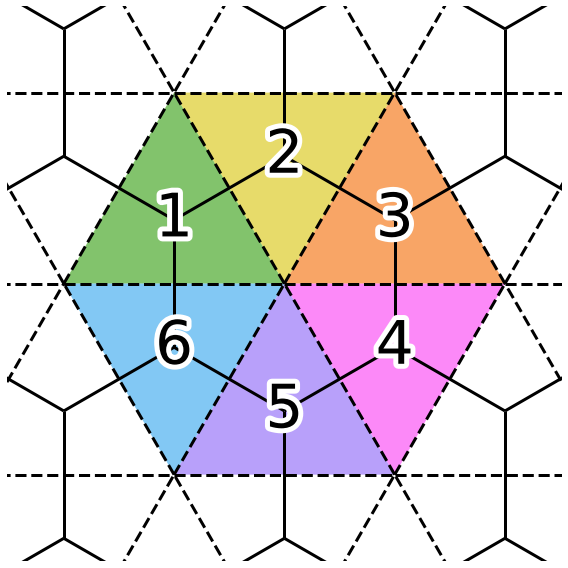

In [54]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

adduptri((-1, 0), to_rgba(color1, trialpha), "")
xy = trilatloc((-1, 0), "up")
txt = ax.text(xy[0], xy[1], "1", horizontalalignment="center", verticalalignment="center", fontsize=60)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])
adddowntri((0, 0), to_rgba(color2, trialpha), "")
xy = trilatloc((0, 0), "down")
txt = ax.text(xy[0], xy[1], "2", horizontalalignment="center", verticalalignment="center", fontsize=60)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])
adduptri((0, 0), to_rgba(color3, trialpha), "")
xy = trilatloc((0, 0), "up")
txt = ax.text(xy[0], xy[1], "3", horizontalalignment="center", verticalalignment="center", fontsize=60)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])

adddowntri((0, -1), to_rgba(color6, trialpha), "")
xy = trilatloc((0, -1), "down")
txt = ax.text(xy[0], xy[1], "6", horizontalalignment="center", verticalalignment="center", fontsize=60)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])
adduptri((0, -1), to_rgba(color5, trialpha), "")
xy = trilatloc((0, -1), "up")
txt = ax.text(xy[0], xy[1], "5", horizontalalignment="center", verticalalignment="center", fontsize=60)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])
adddowntri((1, -1), to_rgba(color4, trialpha), "")
xy = trilatloc((1, -1), "down")
txt = ax.text(xy[0], xy[1], "4", horizontalalignment="center", verticalalignment="center", fontsize=60)
txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])

"""
for x in range(-1, 2):
	for y in range(-1, 2):
		ax.add_patch(mpatches.RegularPolygon((x * 3/2 * np.sqrt(3) * latticeconstant, -latticeconstant + y * 3 * latticeconstant + x * 3/2 * latticeconstant),
			numVertices=6,
			radius=latticeconstant*np.sqrt(3),
			orientation=np.pi / 6, facecolor=None, fill=False, ec="black", lw=5))
"""

ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
draw_hexalattice()
ax.set_xlim([-12, 12])
ax.set_ylim([-12 - latticeconstant, 12 - latticeconstant])
plt.tight_layout()
plt.savefig(base_dir + "overlap.png", dpi=100)
plt.savefig(base_dir + "overlap.svg", dpi=100)

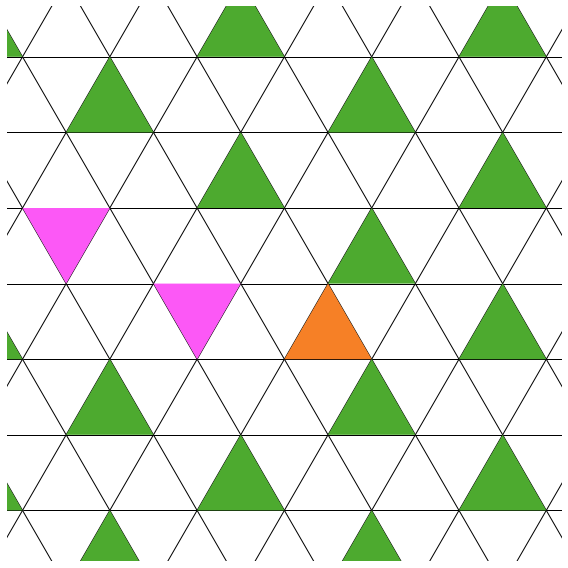

In [99]:
R = 1

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    for y in range(-8, 9, 1):
        xlen = 20
        xrange = (-(y // 2) - xlen // 2, -(y // 2) + xlen - xlen // 2)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            
            if y % 2 == 1:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x < xrange[1] - 1:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
            elif y > -8:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x > xrange[0]:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 2))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    for x in range(-10, 10):
        for y in range(-10, 10):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color))

def adddowntri(xy, name, **kwargs):
    xy = trilatloc(xy, "down")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=np.pi, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def adduptri(xy, name, **kwargs):
    xy = trilatloc(xy, "up")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=0, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def addarrow(downxy, upxy):
    downxy = trilatloc(downxy, "down")
    upxy = trilatloc(upxy, "up")
    
    ax.add_patch(mpatches.FancyArrow(upxy[0], upxy[1], downxy[0] - upxy[0], downxy[1] - upxy[1], color="black", width=0.10, head_width=0.5, head_length=0.5, length_includes_head=True))    

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

for i in [(0, -4), (3, -4),
            (-2, -3), (1, -3), (4, -3),
            (-1, -2), (2, -2), (5, -2),
            (-3, -1), (3, -1),
            (1, 0),
            (-1, 1), (2, 1),
            (-3, 2), (0, 2),
            (-5, 3), (-2, 3), (1, 3),
            ]:
    adduptri(i, "", facecolor=to_rgba(color1, 1))

for i in [(-3, 0), (-1, -1)]:
    adddowntri(i, "", facecolor=to_rgba(color4, 1))
adduptri((1, -1), "", facecolor=to_rgba(color3, 1))

ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-6.5, 4.5])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "fract1.png", dpi=100)
plt.savefig(base_dir + "fract1.svg", dpi=100)

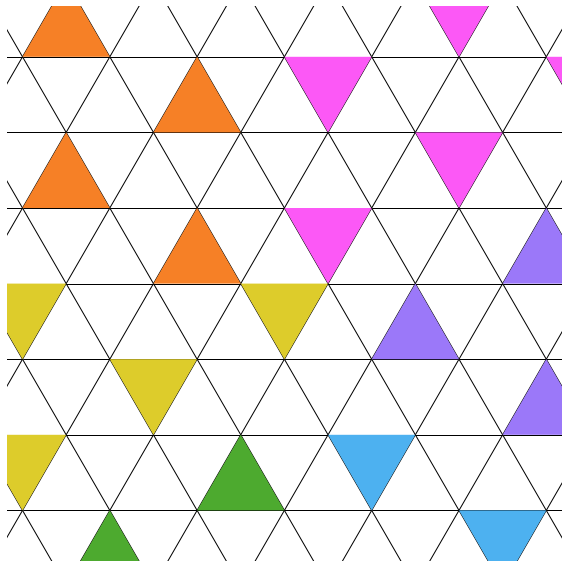

In [56]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

for i in [(-2, -3), (-1, -2), (-3, -1)]:
    adddowntri(i, "", facecolor=to_rgba(color2, 1))

for i in [(-1, 0), (-3, 1), (-2, 2), (-4, 3)]:
    adduptri(i, "", facecolor=to_rgba(color3, 1))

for i in [(0, 0), (1, 1), (-1, 2), (2, 2), (0, 3)]:
    adddowntri(i, "", facecolor=to_rgba(color4, 1))

for i in [(2, -1), (4, -2), (3, 0)]:
    adduptri(i, "", facecolor=to_rgba(color5, 1))

for i in [(2, -3), (4, -4)]:
    adddowntri(i, "", facecolor=to_rgba(color6, 1))

for i in [(1, -3), (0, -4)]:
    adduptri(i, "", facecolor=to_rgba(color1, 1))

adddowntri((0, -1), "", facecolor=to_rgba(color2, 1))

ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-6.5, 4.5])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "fract2.png", dpi=100)
plt.savefig(base_dir + "fract2.svg", dpi=100)

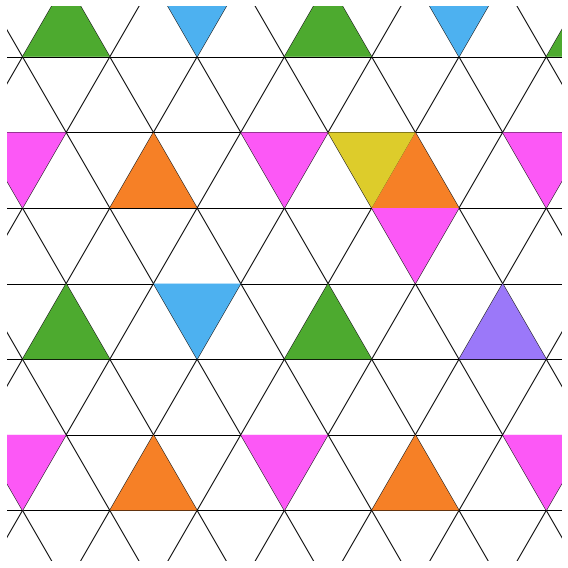

In [135]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

adduptri((-4, 3), "", facecolor=to_rgba(color1, 1))
adddowntri((-3, 3), "", facecolor=to_rgba(color6, 1))
adduptri((-1, 3), "", facecolor=to_rgba(color1, 1))
adddowntri((0, 3), "", facecolor=to_rgba(color6, 1))
adduptri((2, 3), "", facecolor=to_rgba(color1, 1))

adddowntri((-4, 1), "", facecolor=to_rgba(color4, 1))
adduptri((-2, 1), "", facecolor=to_rgba(color3, 1))
adddowntri((-1, 1), "", facecolor=to_rgba(color4, 1))
adduptri((1, 1), "", facecolor=to_rgba(color3, 1))
adddowntri((2, 1), "", facecolor=to_rgba(color4, 1))
adddowntri((0, 1), "", facecolor=to_rgba(color2, 1))
adddowntri((1, 0), "", facecolor=to_rgba(color4, 1))

adduptri((-2, -1), "", facecolor=to_rgba(color1, 1))
adddowntri((-1, -1), "", facecolor=to_rgba(color6, 1))
adduptri((1, -1), "", facecolor=to_rgba(color1, 1))

adduptri((3, -1), "", facecolor=to_rgba(color5, 1))

adddowntri((-2, -3), "", facecolor=to_rgba(color4, 1))
adduptri((0, -3), "", facecolor=to_rgba(color3, 1))
adddowntri((1, -3), "", facecolor=to_rgba(color4, 1))
adduptri((3, -3), "", facecolor=to_rgba(color3, 1))
adddowntri((4, -3), "", facecolor=to_rgba(color4, 1))

ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-6.5, 4.5])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "fract3.png", dpi=100)
plt.savefig(base_dir + "fract3.svg", dpi=100)

In [57]:
def j4bondline(xy1, xy2, color=None):
    xy1 = (
        xy1[0] * np.sqrt(3) * latticeconstant + xy1[1] * np.sqrt(3) * latticeconstant / 2,
        xy1[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    xy2 = (
        (xy2[0] + 1/2) * np.sqrt(3) * latticeconstant + xy2[1] * np.sqrt(3) * latticeconstant / 2,
        xy2[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    j4bondlineabs(xy1, xy2, 6, latticeconstant, color=color)

def j4bondlineabs(xy1, xy2, thick, latcon, do=[0, 1, 2], color=None):
    if color is None:
        color = to_rgba(color4, 1)
        
    if xy1[1] > xy2[1]:
        xy1, xy2 = xy2, xy1
        
    if abs(xy1[1] - xy2[1]) > 2 * abs(xy1[0] - xy2[0]):
        if 0 in do: ax.plot([xy1[0], xy1[0]], [xy1[1], xy1[1] + latcon], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0]], [xy2[1], xy2[1] - latcon], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0], xy2[0]], [xy1[1] + latcon, xy2[1] - latcon], lw=thick, color=color, zorder=3) 
    elif xy1[0] > xy2[0]:
        if 0 in do: ax.plot([xy1[0], xy1[0] - latcon*np.sqrt(3)/2], [xy1[1], xy1[1] + latcon/2], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0] + latcon*np.sqrt(3)/2], [xy2[1], xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0] - latcon*np.sqrt(3)/2, xy2[0] + latcon*np.sqrt(3)/2],
                    [xy1[1] + latcon/2, xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
    else:
        if 0 in do: ax.plot([xy1[0], xy1[0] + latcon*np.sqrt(3)/2], [xy1[1], xy1[1] + latcon/2], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0] - latcon*np.sqrt(3)/2], [xy2[1], xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0] + latcon*np.sqrt(3)/2, xy2[0] - latcon*np.sqrt(3)/2],
                    [xy1[1] + latcon/2, xy2[1] - latcon/2], lw=thick, color=color, zorder=3) 

In [71]:
height = 4
width = 6

plt.rcParams["mathtext.fontset"] = "dejavuserif"

def drawstate(A, B, J4, name, lattice="tri", wf="tri", annotate_j4=[], annotate_wf=None, doubleA=[], holes=([],[])):
    annotate_j4 = []
    annotate_wf = None
    import matplotlib.collections as mc
    if wf == "tri":
        for index, pair in enumerate(A):
            i, c = pair
            adduptri(i, index, facecolor=to_rgba(c, 1))
        for index, pair in enumerate(B):
            i, c = pair
            adddowntri(i, index, facecolor=to_rgba(c, 1))
    else:
        for i, c in A:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor=to_rgba(c, 1), ec='k'))
            if i in doubleA:
                ax.text(xy[0], xy[1], "↑↓", fontfamily="serif", fontsize=15, zorder=3, horizontalalignment='center', verticalalignment='center')
                
        for i, c in B:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor=to_rgba(c, 1), ec='k'))
            
        for i in holes[0]:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor='white', ec='k'))
        
                
        for i in holes[1]:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor='white', ec='k'))
            
    if annotate_wf is not None:
        xy = trilatloc(annotate_wf, "up")
        collection = mc.StarPolygonCollection(
            numsides=5, # a pentagon
            rotation=0,
            sizes=(1000,),
            facecolors="black",
            edgecolors="black",
            linewidths=(1,),
            offsets=xy,
            transOffset=ax.transData,
            zorder=3
            )
        ax.add_collection(collection)
        
    
    ind = 0
    for i, j in J4:
        Axy = trilatloc(A[i], "up")
        Bxy = trilatloc(B[j], "down")
        j4bondlineabs(Axy, Bxy, 4, R)
        # ax.plot([Axy[0], Bxy[0]], [Axy[1], Bxy[1]], color=to_rgba(color4, 1), lw=5, zorder=1.5)
        if ind in annotate_j4:
            midpoint = ((Axy[0] + Bxy[0])/2, (Axy[1] + Bxy[1])/2)
            ax.add_patch(mpatches.Circle((midpoint[0], midpoint[1]), 0.5, lw=5, edgecolor="#1f8915", facecolor="white", fill=True, zorder=2))
            ax.text(midpoint[0], midpoint[1], "J$_4$", fontfamily="serif", fontsize=34, zorder=3, horizontalalignment='center', verticalalignment='center')
            
        ind += 1

    ax.set_xlim([-0.2, 24.2])
    ax.set_ylim([-5.2, 19.2])
    ax.axis("off")
    
    if height < 8:
        ax.set_xlim([0, 16])
        ax.set_ylim([0, 8])
    
    plt.tight_layout()
    
    if name is not None:
        plt.savefig(base_dir + name + ".png", dpi=100)
        plt.savefig(base_dir + name + ".svg", dpi=100)

def draw_hexalattice(color=None, ls="-"):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    for y in range(height + 1):
        xlen = width + 1
        xrange = (0, width + 1)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
                
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
            
            #if x < xrange[1] - 1:
                #HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, ls=ls, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None, ls="-"):
    if color is None:
        color = "black"
    for x in range(1, width):
        for y in range(1, height):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color, ls=ls))
    xy = trilatloc((0, 0), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)
    xy = trilatloc((width - 1, height - 1), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)

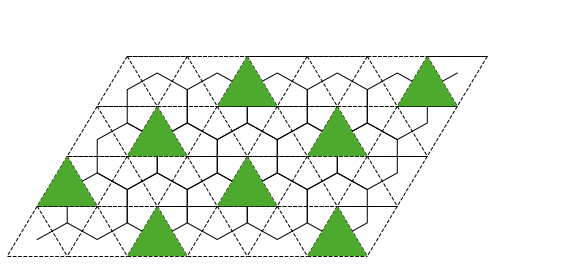

In [73]:
A = [
    ((3 * x - y - 10, y * 2 - 8), color1) for x in range(10) for y in range(10)
] + [
    ((3 * x - y - 9, y * 2 - 8 + 1), color1) for x in range(10) for y in range(10)
]

A = [(i,c) for (i,c) in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 4])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, [], [], "root3tri", lattice="tri", annotate_wf=(-1, -2))

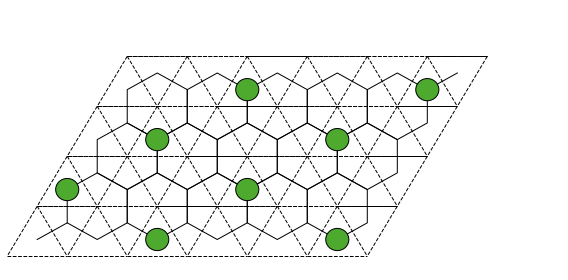

In [74]:
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, [], [], "root3hex", lattice="hexa", wf="hexa", annotate_wf=(-1, -2))

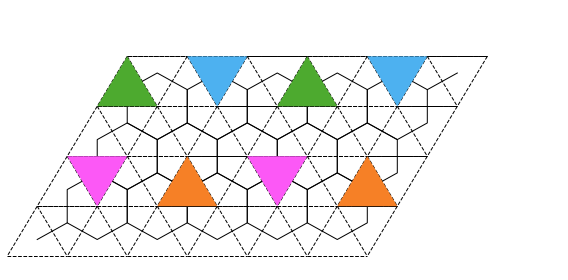

In [75]:
A = [((0, 4), color1), ((3, 4), color1), ((2, 2), color3), ((5, 2), color3)]
B = [((1, 4), color6), ((4, 4), color6), ((0, 2), color4), ((3, 2), color4)]

fig, ax = plt.subplots(1, 1, figsize=[8, 4])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "j4gstri", lattice="tri")

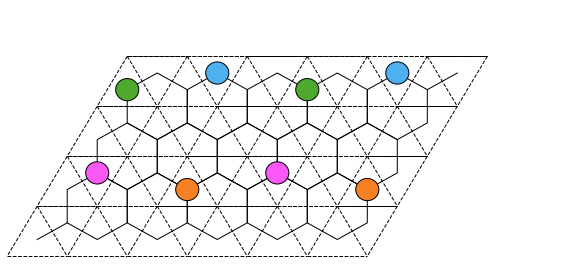

In [76]:
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
draw_duallattice("k")
draw_hexalattice("k", ls="--")
drawstate(A, B, [], "j4gshex", lattice="hexa", wf="hexa", annotate_wf=(-1, -2))